<a href="https://colab.research.google.com/github/KijoSal-dev/Employee_Retention_Prediction_Project/blob/main/Salome_Kungu_HR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
from sklearn import linear_model

Mounted at /content/drive


In [3]:
df= pd.read_csv("/content/drive/MyDrive/HR_comma_sep 1.csv")
df. head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


1)Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)




In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [5]:
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

In [6]:
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


In [7]:
print(df['left'].value_counts(normalize=True))
print(df['left'].value_counts())

left
0    0.761917
1    0.238083
Name: proportion, dtype: float64
left
0    11428
1     3571
Name: count, dtype: int64


In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove('left') # 'left' is the target variable

for col in numerical_cols:
    print(f"\nAverage {col} grouped by 'left':")
    print(df.groupby('left')[col].mean())



Average satisfaction_level grouped by 'left':
left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Average last_evaluation grouped by 'left':
left
0    0.715473
1    0.718113
Name: last_evaluation, dtype: float64

Average number_project grouped by 'left':
left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Average average_montly_hours grouped by 'left':
left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

Average time_spend_company grouped by 'left':
left
0    3.380032
1    3.876505
Name: time_spend_company, dtype: float64

Average Work_accident grouped by 'left':
left
0    0.175009
1    0.047326
Name: Work_accident, dtype: float64

Average promotion_last_5years grouped by 'left':
left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64


In [9]:
categorical_cols = ['Department', 'salary']

for col in categorical_cols:
    print(f"\nProportion of employees who left within each {col}:")
    # Calculate the proportion of 'left' (1) for each category
    proportion_left = df.groupby([col, 'left']).size().unstack(fill_value=0)
    proportion_left['Total'] = proportion_left[0] + proportion_left[1]
    proportion_left['Proportion_Left'] = proportion_left[1] / proportion_left['Total']
    print(proportion_left[['Proportion_Left']])


Proportion of employees who left within each Department:
left         Proportion_Left
Department                  
IT                  0.222494
RandD               0.153748
accounting          0.265971
hr                  0.290934
management          0.144444
marketing           0.236597
product_mng         0.219512
sales               0.244928
support             0.248991
technical           0.256250

Proportion of employees who left within each salary:
left    Proportion_Left
salary                 
high           0.066289
low            0.296884
medium         0.204313


2)Plot bar charts showing impact of employee salaries on retention


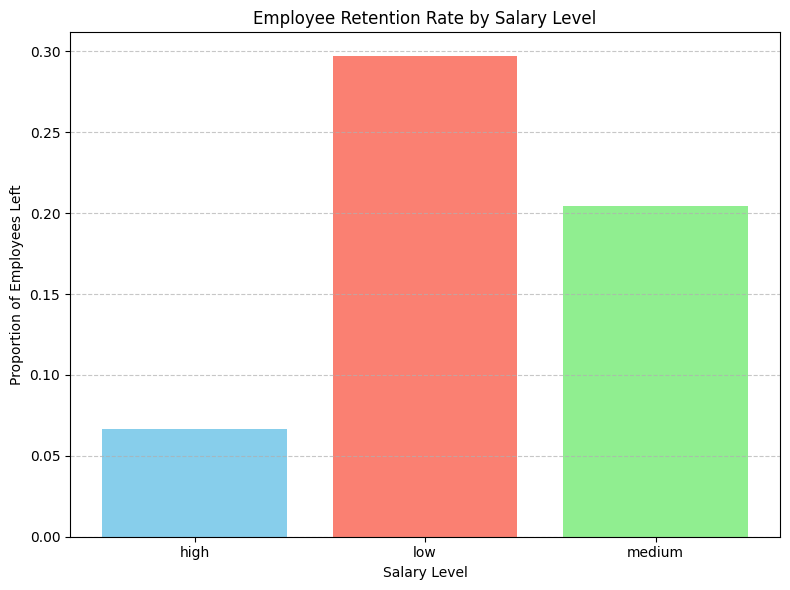

In [19]:
plt.figure(figsize=(8, 6))
proportion_left_salary = proportion_left['Proportion_Left']
plt.bar(proportion_left_salary.index, proportion_left_salary.values, color=['skyblue', 'salmon', 'lightgreen'])
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees Left')
plt.title('Employee Retention Rate by Salary Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3)Plot bar charts showing corelation between department and employee retention

In [12]:
proportion_left_department = df.groupby(['Department', 'left']).size().unstack(fill_value=0)
proportion_left_department['Total'] = proportion_left_department[0] + proportion_left_department[1]
proportion_left_department['Proportion_Left'] = proportion_left_department[1] / proportion_left_department['Total']

print("Proportion of employees who left within each Department:")
print(proportion_left_department[['Proportion_Left']])

Proportion of employees who left within each Department:
left         Proportion_Left
Department                  
IT                  0.222494
RandD               0.153748
accounting          0.265971
hr                  0.290934
management          0.144444
marketing           0.236597
product_mng         0.219512
sales               0.244928
support             0.248991
technical           0.256250


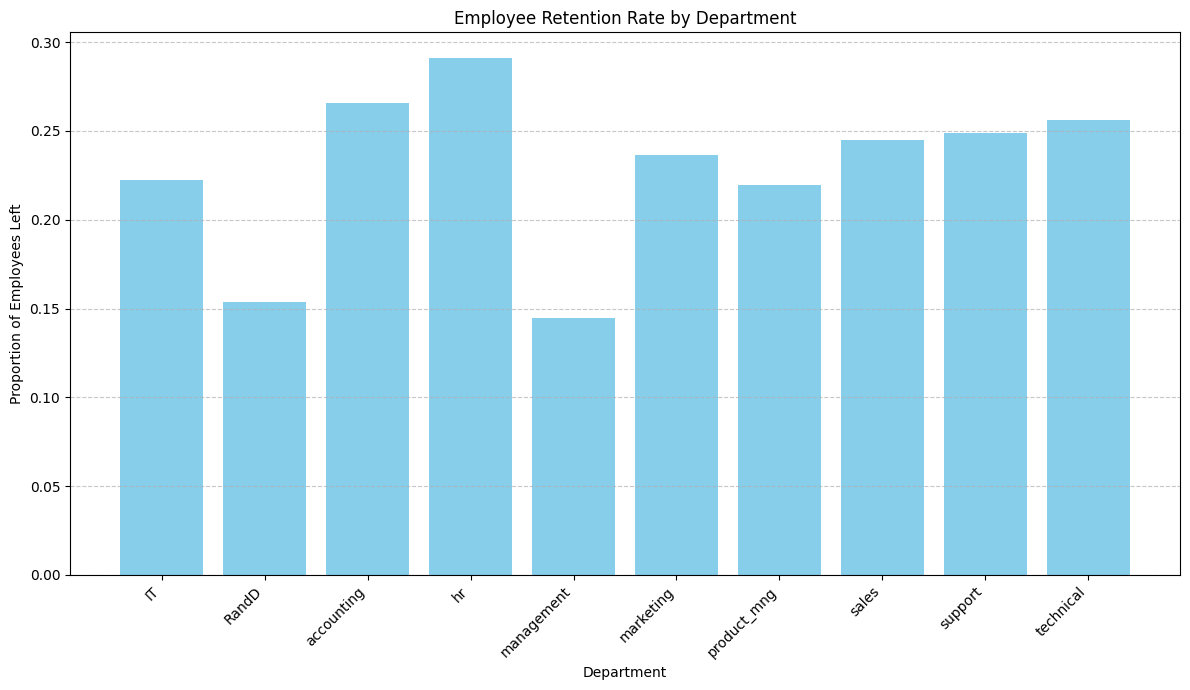

In [13]:
plt.figure(figsize=(12, 7))
plt.bar(proportion_left_department.index, proportion_left_department['Proportion_Left'], color='skyblue')
plt.xlabel('Department')
plt.ylabel('Proportion of Employees Left')
plt.title('Employee Retention Rate by Department')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4)Now build logistic regression model using variables that were narrowed down in step 1


In [14]:
X = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
y = df['left']

print("Features (X) head:")
print(X.head())
print("\nTarget variable (y) head:")
print(y.head())

Features (X) head:
   satisfaction_level  average_montly_hours  time_spend_company  \
0                0.38                   157                   3   
1                0.80                   262                   6   
2                0.11                   272                   4   
3                0.72                   223                   5   
4                0.37                   159                   3   

   Work_accident  promotion_last_5years Department  salary  
0              0                      0      sales     low  
1              0                      0      sales  medium  
2              0                      0      sales  medium  
3              0                      0      sales     low  
4              0                      0      sales     low  

Target variable (y) head:
0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64


In [15]:
X = pd.get_dummies(X, columns=['Department', 'salary'], drop_first=True)
print("Features (X) after one-hot encoding:")
print(X.head())

Features (X) after one-hot encoding:
   satisfaction_level  average_montly_hours  time_spend_company  \
0                0.38                   157                   3   
1                0.80                   262                   6   
2                0.11                   272                   4   
3                0.72                   223                   5   
4                0.37                   159                   3   

   Work_accident  promotion_last_5years  Department_RandD  \
0              0                      0             False   
1              0                      0             False   
2              0                      0             False   
3              0                      0             False   
4              0                      0             False   

   Department_accounting  Department_hr  Department_management  \
0                  False          False                  False   
1                  False          False                  Fals

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (10499, 16)
X_test shape: (4500, 16)
y_train shape: (10499,)
y_test shape: (4500,)


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=42)
print("Logistic Regression model initialized.")

Logistic Regression model initialized.


In [18]:
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


5)Measure the accuracy of the model

## Summary:

### Data Analysis Key Findings

*   **Overall Employee Retention**: Approximately 23.81% of employees (3,571 individuals) have left the company, while 76.19% (11,428 individuals) have stayed.
*   **Impact of Satisfaction Level**: Employees who left had a significantly lower average satisfaction level (0.44) compared to those who stayed (0.67).
*   **Impact of Work Hours and Time in Company**: Employees who left worked, on average, more hours per month (207.42) than those who stayed (199.06) and had spent, on average, more years with the company (3.88 years) compared to those who stayed (3.38 years).
*   **Impact of Promotions**: Employees who stayed were significantly more likely to have received a promotion in the last 5 years (average 0.026) than those who left (average 0.005), suggesting a strong link between lack of promotion and attrition.
*   **Impact of Work Accidents**: Employees who stayed were much more likely to have had a work accident (average 0.175) than those who left (average 0.047), indicating that work accidents are not a direct driver for leaving.
*   **Impact of Salary**: Salary is a strong predictor of retention. Employees with 'low' salaries had the highest proportion of leaving (29.69%), 'medium' salaries had a moderate proportion (20.43%), and 'high' salaries had a significantly lower proportion of leaving (6.63%).
*   **Impact of Department**: 'HR' (29.09%) and 'accounting' (26.60%) departments showed the highest proportion of employees leaving, while 'Management' (14.44%) and 'RandD' (15.37%) departments showed the lowest proportion.
*   **Model Building**: A logistic regression model was successfully built and trained using `satisfaction_level`, `average_montly_hours`, `time_spend_company`, `Work_accident`, `promotion_last_5years`, `Department`, and `salary` as features, after performing one-hot encoding for categorical variables and splitting the data into training and testing sets.

### Insights or Next Steps

*   The initial exploratory data analysis has successfully identified several key factors influencing employee retention. Management should focus on improving employee satisfaction, addressing workload issues (average monthly hours), reviewing promotion policies, and investigating specific departmental and salary-related concerns to enhance retention.
*   The logistic regression model has been successfully built and trained. The immediate next step is to evaluate its performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score) on the test set to understand its predictive capabilities.
